Trong bài này, chúng ta sẽ cài đặt bài toán dự đoán giá nhà dùng linear regression bằng hai cách: cài đặt dùng chỉ mục index và dùng những hàm trong numpy đã hỗ trợ kỹ thuật vectorization. Sau đó, chúng ta sẽ quan sát tốc độ của hai loại cài đặt.

## 1. Dự đoán giá nhà theo diện tích

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

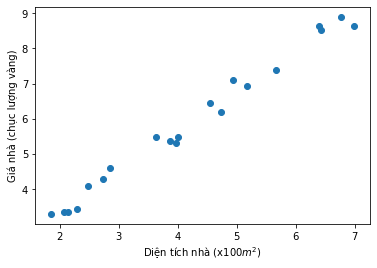

(20, 1) (20, 1) (20, 2)


In [2]:
data = genfromtxt('data/my_house_price_prediction.csv', delimiter=',')
m = data.shape[0]
n = data.shape[1]
x = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)
X = np.c_[np.ones((m, 1)), x]

plt.scatter(x,y)
plt.xlabel("Diện tích nhà (x100$m^2$)")
plt.ylabel("Giá nhà (chục lượng vàng)")
plt.show()
print(x.shape, y.shape, X.shape)

### Cài theo cách dùng chỉ mục index

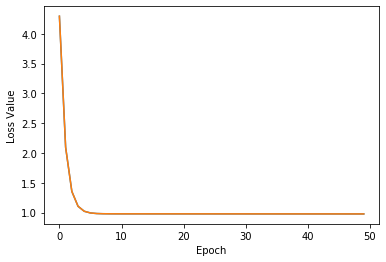

In [3]:
theta = np.random.randn(n)

#loss function
def loss_function(theta = theta, x = X, y=y, m=m, n=n):
    loss = 0
    for i in range(m):
        hypo_i = 0
        for j in range(n):
            hypo_i += theta[j]*X[i,j]
        loss_i = (hypo_i - y[i])**2
        loss += loss_i
        
    return loss

#training 
learning_rate = 0.01
theta = np.ones(n)
loss_list = []

epoches = 50

for itr in range(epoches):
    dev_list = []
    for k in range(n):
        dev_sum = 0
        
        for i in range(m):
            #feed forward
            hypo_i = 0
            for j in range(n):
                hypo_i += theta[j]*X[i,j]
            
            #derivate
            dev_i = (hypo_i - y[i])*X[i,k]
            dev_sum += dev_i
        
        dev_sum = (2/m)*dev_sum
        
        dev_list.append(dev_sum)
        
    theta = theta - learning_rate*np.array(dev_list)
    loss_Val = loss_function(theta)
    loss_list.append(loss_Val)
    
plt.plot(np.arange(0,epoches), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.show()    

### Cài theo phương pháp Vectorization

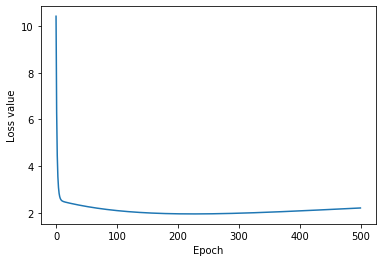

In [4]:
theta = np.random.randn(n).reshape(-1,1)

def cost(theta, X=x, y=y, m=m):
    return np.sum((np.dot(X,theta.T) - y)**2)/m

learning_rate = 0.01
cost_list = []

epoches = 500

for i in range(epoches):
    y_pred = np.dot(X,theta)
    loss_grd = y_pred - y
    gradients = (2/m)*np.dot(X.T, loss_grd)
    
    theta = theta - learning_rate*gradients
    cost_val = cost(theta)
    cost_list.append(cost_val)
    
# print(cost_list)
plt.plot(np.arange(0,epoches), cost_list)
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.show()

## 2. Dự đoán giá nhà Boston

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("data/Boston_Dataset.csv")

In [9]:
#Chuẩn hóa dữ liệu đầu vào
def normal(x:list):
    maxi = max(x)
    mini = min(x)
    avg = np.mean(x)
    new = [(i - avg)/(maxi - mini) for i in x]
    
    return new

In [10]:
df = data.copy()
df.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [11]:
df = df.apply(normal, axis=0) #Data after normalizing
df[:5]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.494954,-0.045616,0.073108,-0.332722,-0.06006,-0.039391,0.059911,-0.032196,0.039670,-0.375375,-0.216595,-0.366052,0.095155,-0.207931,0.027361
1,-0.492974,-0.045330,-0.106892,-0.156425,-0.06006,-0.181367,0.030089,0.113549,0.131219,-0.331897,-0.319846,-0.075354,0.095155,-0.093141,-0.025973
2,-0.489014,-0.045261,-0.106892,-0.337536,-0.06006,-0.204000,0.141824,-0.238579,0.245521,-0.288419,-0.358087,0.029297,0.089385,-0.264223,0.236250
3,-0.487034,-0.044763,-0.106892,-0.337536,-0.06006,-0.204000,0.170678,-0.149217,0.245521,-0.288419,-0.358087,0.029297,0.095155,-0.198274,0.298472
4,-0.483073,-0.044501,0.018108,-0.126796,-0.06006,-0.068198,-0.049113,-0.017302,0.193156,-0.201462,-0.187914,-0.377680,0.091850,-0.002357,0.002916


In [12]:
#remove 'medv' column
Xd = df.drop('medv', axis=1)
#add new column: bias column. pd.DataFrame.insert(location, name_col, value)
Xd.insert(0, 'X0', 1)

Xd.tail(5)

,X0,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
328,1,0.493164,-0.043283,-0.106892,-0.059388,-0.06006,0.057317,-0.134899,0.056102,-0.136737,-0.157984,-0.034951,0.087436,0.092282,0.071318
329,1,0.497125,-0.044850,-0.106892,0.023575,-0.06006,0.032625,0.063397,0.009293,-0.128522,-0.375375,-0.260572,0.296739,0.082674,-0.078516
330,1,0.499105,-0.045086,-0.106892,0.023575,-0.06006,0.032625,-0.028199,0.090144,-0.148469,-0.375375,-0.260572,0.296739,0.095155,-0.094797
331,1,0.501085,-0.044875,-0.106892,0.023575,-0.06006,0.032625,0.137564,0.242272,-0.160994,-0.375375,-0.260572,0.296739,0.095155,-0.189720
332,1,0.505046,-0.045057,-0.106892,0.023575,-0.06006,0.032625,-0.045627,0.133761,-0.125767,-0.375375,-0.260572,0.296739,0.095155,-0.127909


In [13]:
#numpy array format
y = df['medv'].values
X = Xd.values

#sample size
m, n = X.shape
print(m,n)

333 15


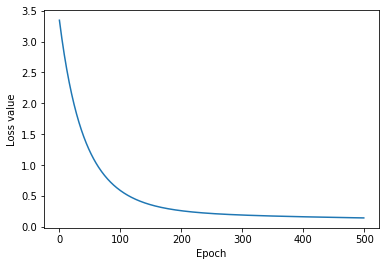

Loss =  0.14408082396405036


In [14]:
#Vectorization

#Initialize theta
theta = np.ones(n)

def cost(theta, X=X, y=y, m=m):
    y_hat = np.dot(X, theta)
    return np.sum((y_hat - y)**2)/m

learning_rate =0.01
theta = np.ones(n)
cost_list= []
epoches = 500

for i in range(epoches):
    y_hat = np.dot(X, theta)
    loss_grd = y_hat - y
    gradients = (2/m)*np.dot(X.T, loss_grd)
    theta = theta - learning_rate*gradients
    cost_val = cost(theta)
    cost_list.append(cost_val)
    
plt.plot(np.arange(epoches), cost_list)
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.show()
print('Loss = ',cost_list[-1])